In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = "/Users/iWolfer/Desktop/Pycharm/homework(pds6)/Lessons 60+/62/wolf.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# фільтра Собеля ------
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

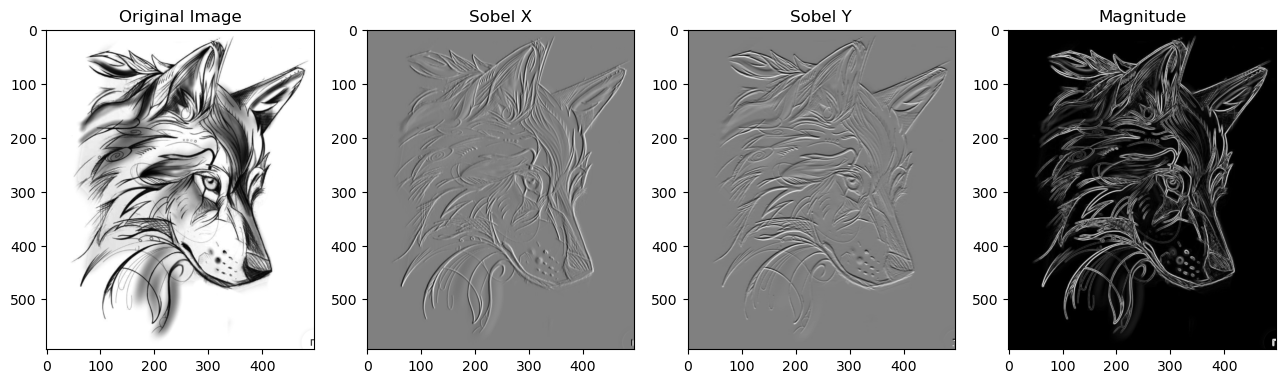

In [2]:
# Використання HOG
hog = cv2.HOGDescriptor()
features = hog.compute(image)

# Візуалізація
plt.figure(figsize=(20, 10))

# оригінал
plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

# фільтр Собеля
plt.subplot(1, 5, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Magnitude')
plt.imshow(magnitude, cmap='gray')

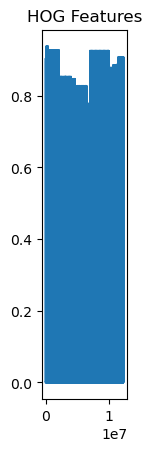

In [3]:
# Ознаки HOG
plt.subplot(1, 5, 5)
plt.title('HOG Features')
plt.plot(features)

plt.show()

In [4]:
# Останнє завдання але внизу я робив бонус плюс...

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog

# Завантаження даних (приклад - датасет цифр)
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Метод HOG
hog_descriptors = []

for img in X_train:
    fd = hog(img.reshape(8, 8), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=False)
    hog_descriptors.append(fd)

# Навчання класифікатора (SVM)
hog_clf = SVC()
hog_clf.fit(hog_descriptors, y_train)

# Тестування та оцінка точності
hog_test_descriptors = []

for img in X_test:
    fd = hog(img.reshape(8, 8), orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=False)
    hog_test_descriptors.append(fd)

hog_pred = hog_clf.predict(hog_test_descriptors)

hog_accuracy = accuracy_score(y_test, hog_pred)
print("HOG Accuracy:", hog_accuracy)


HOG Accuracy: 0.9648148148148148


In [5]:
# Ви на лекциї казали за те щоб проробили з BF Match порівняти картинки

In [1]:
import cv2
import matplotlib.pyplot as plt

# Шлях до зображень
path1 = '/Users/iWolfer/Desktop/Pycharm/homework(pds6)/Lessons 60+/62/stone1.jpg'
path2 = '/Users/iWolfer/Desktop/Pycharm/homework(pds6)/Lessons 60+/62/stone2.jpg'

# Завантаження зображень
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

In [2]:
# Переводимо зображення у сірий колір
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Ініціалізація SIFT детектора
sift = cv2.SIFT_create()

# Знаходження ключових точок та дескрипторів
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [3]:
# Ініціалізація BFMatcher
bf = cv2.BFMatcher()

# Пошук відповідностей між дескрипторами
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Застосування Ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Відображення відповідних точок
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Конвертація зображення з BGR до RGB
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

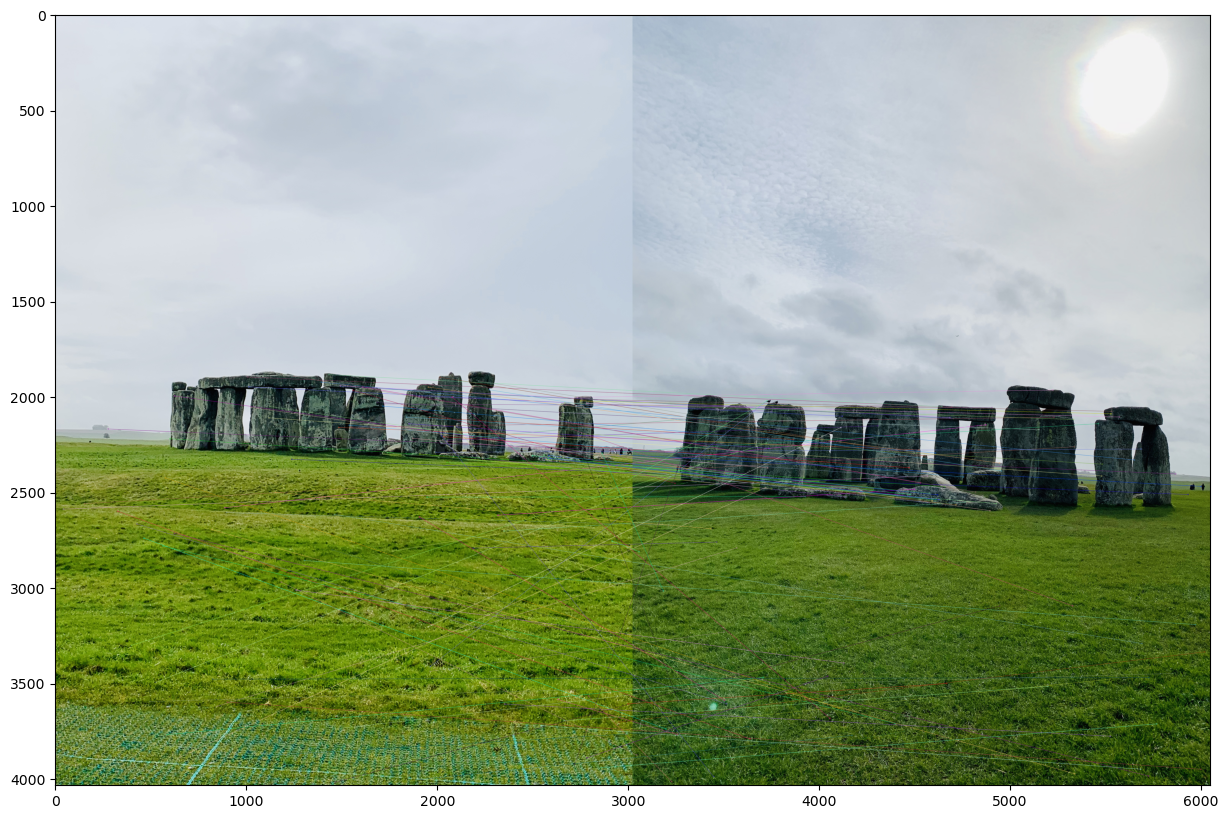

In [4]:
# Показати результат
plt.figure(figsize=(20,10))
plt.imshow(img_matches)
plt.show()